In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


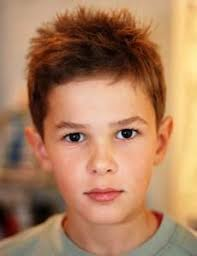

No of faces: 1


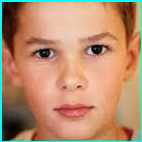

dimension of model input: 1


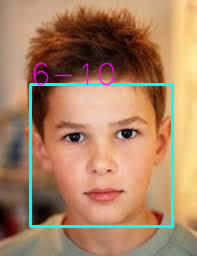

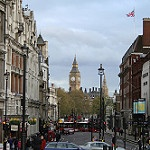

No of faces: 0
face not detected


In [5]:
from keras.applications.mobilenet import preprocess_input
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import cv2

CATEGORIES = ["1-5","11-13","14-15","16-17","18-20","20+","6-10"]

#loading of deep learning model
model_save_name = "age12.h5"
model_path=F"/content/drive/My Drive/Colab Notebooks/final_UTKface/{model_save_name}"
model = load_model(model_path)
#Loading of image 
pathlist =  ["/content/drive/My Drive/Colab Notebooks/sdf.jpg","/content/drive/My Drive/Colab Notebooks/19974.jpg"]
for path in pathlist:
  img = cv2.imread(path)
  cv2_imshow(img)

  #font for disolaying the text on image and loading  a CascadeClassifier to detect face in input image 
  font = cv2.FONT_HERSHEY_SIMPLEX
  face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/final_UTKface/haarcascade_frontalface_default.xml')
  #changing RGB to Grayscale and facesdetection
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 3)
  #print the no of faces is detected
  print("No of faces:",len(faces))


  #if the  no of faces is greater then zero then process the image for prediction 
  if(len(faces)>0):
      for (x, y, w, h )in faces:
        #drawing a rectangle around the faces and crop and print the only face and giving this face for prediction 
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2) 
        face_img = img[y:y+h, x:x+w].copy()
        cv2_imshow(face_img)
        #resizing of image for mobilenet input
        imgs = cv2.resize(face_img, (224, 224))
        img_array = image.img_to_array(imgs)
        img_array_expanded_dims = np.expand_dims(img_array, axis=0)
        print("dimension of model input:",len(img_array_expanded_dims))
        prediction = model.predict(preprocess_input(img_array_expanded_dims))
        predicted_age = CATEGORIES[prediction[0].argmax()]
        cv2.putText(img,predicted_age, (x, y), font, 1, (255,0, 255), 1, cv2.LINE_AA)
        cv2_imshow(img)
  else:
    print("face not detected")